Projet  Final de MAP572

Xin Chen et Ge Jin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
### Q1.1 Simuler le graphe G_n
#        Input: number of edges and vertex n 
#        Output: 2d-array representing the graph

def Simu_Gn(n): 
    G = np.zeros((n,n)) ##build a 2d-array that simulate the graph
    G[0][0] = 1
    X = np.arange(n)
    for i in range(1,n):
        P = np.sum(G, axis = 1) / (2*i-1)
        j = np.random.choice(X, p = P)
        G[i][j]=1
        G[j][i]=1
    return G

#    calculate the degree of vertex s in the graph G
def degree(G,s): 
    return np.sum(G[s,:])

In [6]:
G=Simu_Gn(3)

$\mathcal{P}(v_{k+1}=i) = \frac{degree(i)}{2k-1}$.

If $\mathcal{P}(d(s) = k) \approx ck^{-\alpha}$, we'll have  $ln(\mathcal{P}(d(s)=k)) = -\alpha ln(k) + ln(c)$. Thus, to illustrate the power-law, it's enough to plot the relation between $ln(P)$ and $ln(k)$, expecting to get a linear figure. 

In [27]:
### Q1.2 Illustrate power-law


#    calculate the degree of an array of vertex S in the graph G
# def degree(G,S): 
#   return np.sum(G[S,:], axis=1)



# calculate the prob where P(d(s) = k)
def pdfDegre(G, k):
    n = G.shape[0]
    M = 1000
    setS = np.random.randint(n, size = M)  #choose s randomly
    setD = np.array([degree(G, i) for i in setS])
    prob = np.mean(setD == k)
    return prob

def Q12():
    G = Simu_Gn(1000)

    setK = np.arange(20) + 5
    setP = np.array([pdfDegre(G, k) for k in setK])
    setI = setP.nonzero()

    adjustedK = np.log(setK[setI])
    adjustedP = np.log(setP[setI])

    # Linear regression
    reg = LinearRegression().fit(adjustedK.reshape(-1,1), adjustedP)
    a = reg.coef_
    b = reg.intercept_

    X = np.arange(min(adjustedK), max(adjustedK), 0.1)
    Y = a * X + b

    # Plot
    plt.figure(figsize = (15,9))
    plt.plot(adjustedK, adjustedP, 'ro', label = 'mesure')
    plt.plot(X, Y, label = 'LinearRegression')
    plt.title('ln(P(d(s)=k)) as a function of ln(k)', {'fontsize' : 24})
    plt.xlabel('ln(k)', {'fontsize' : 24})
    plt.ylabel('ln(P(d(s)=d))', {'fontsize' : 24})
    plt.legend()
    plt.show()

    print('The value of alpha is {:.3f}'.format(-a[0]))
    return 

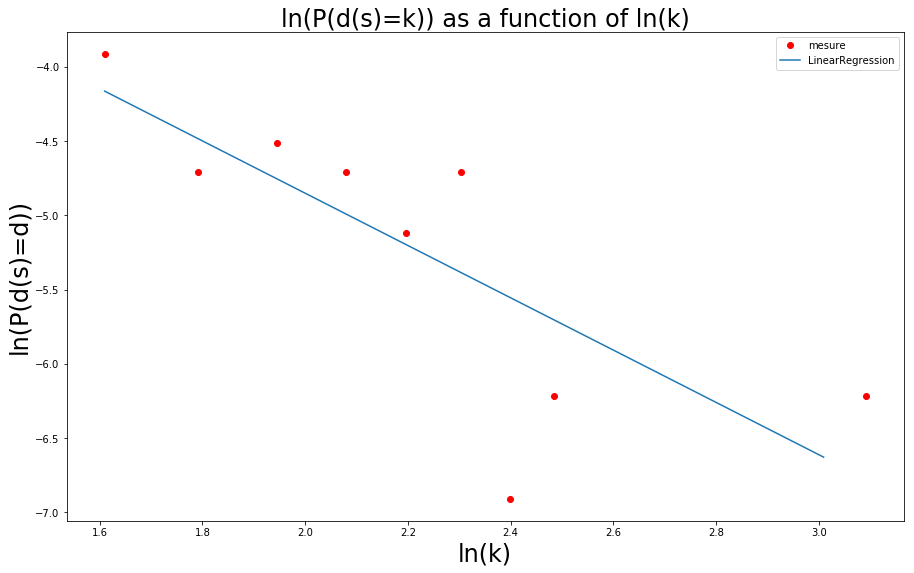

The value of alpha is 1.761


In [28]:
Q12()

Q1.3
In the graph $G_n$, the average degree of a vertex  $\bar{d}_n = (2n-1)/n < 2$. 

However, within $\mathcal{P}(v_{k+1}=i) = \frac{degree(i)}{2k-1}$, we deduce that $E[X_{l+1}|X_l] = (X_l+1)p + X_l(1-p) = X_l + p$ where $p = \frac{X_l}{2l-1}$ denotes the probability that (l+1)-th vertex is connected to vertex 1. So, $ E[X_{l+1}|X_l] = \frac{2l}{2l-1}X_l$.

In fact, $E[X_n] = E[E[X_n|X_{n-1}]] = \frac{2n}{2n-1}E[X_{n-1}] = ... = \Pi_{k=2}^n(\frac{2k}{2k-1})X_1 = \Pi_{k=2}^n\frac{2k}{2k-1}$, which is greater than $\bar{d}_n$ which is smaller than $2$ when $n$ is large enough. 

In [29]:
### Q2.1

def Trace(G, X, Y):
#     G = Simu_Gn(n)
    G_up = np.triu(G)
#     X = np.random.rand(n)
#     Y = np.random.rand(n)
    plt.figure(figsize=(15,9))
    plt.plot(X,Y,'bo')
    (indiceX,indiceY) = np.nonzero(G_up)
    for i in range(indiceX.shape[0]):
        plt.plot((X[indiceX[i]],X[indiceY[i]]),(Y[indiceX[i]],Y[indiceY[i]]),color='#808080',linewidth=1)
    plt.show()
    return

### Trace a graph containing n points

def Q21(n):
    G = Simu_Gn(n)
    X = np.random.rand(n)
    Y = np.random.rand(n)
    Trace(G, X, Y)
    return

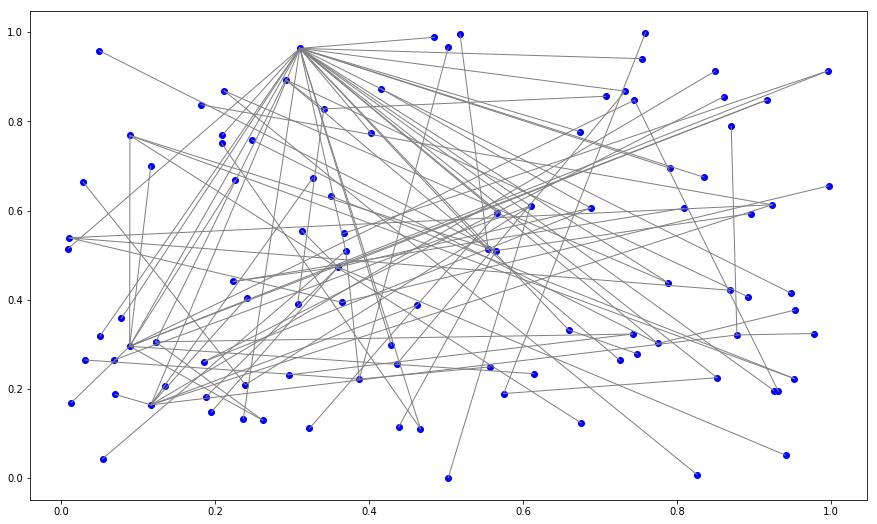

In [71]:
Q21(100)

In [87]:
### Q2.2

# calculate all the neighbours of a vertex v in graph G
def neighbour(G, v):
    return np.nonzero(G[v,:])[0]


# calculate shortest distance between two indices
def minDistance(G, X, Y):
    n = G.shape[0]
    Distance = np.ones((n,n)) * 100  # initialization
    for i in range(n):
        Distance[i,i] = 0
    for i in range(n):
        nb = neighbour(G, i)
        for j in nb:
            d = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)
            Distance[i,j] = d
            Distance[j,i] = d
        for j in range(n):
            if (j not in nb) and (j != i):     # dynamic
                setd = []
                for k in nb:
                    setd.append(Distance[i, k] + Distance[k, j])
                d = min(setd)
                Distance[i,j] = d
                Distance[j,i] = d
    return Distance

# calculate the energy knowing the relationship and M1,...,Mn
def Energy(G, X, Y):
    n = len(X)
    Distance = minDistance(G, X, Y)
    d_max = np.max(Distance)
    D_star = Distance / d_max
    M = np.zeros((n,n))
    E = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            M[i,j] = np.sqrt(((X[i] - X[j])**2 + (Y[i] - Y[j])**2)/ 2)
            if D_star[i,j] != 0:
                E[i,j] = ((M[i,j] - D_star[i,j]) / D_star[i,j])**2       
    Eg = np.sum(E)
    return Eg

# Minimisation of energy
def min_energ(G, X, Y):
    

In [79]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [84]:
G = Simu_Gn(10)
X = np.random.rand(10)
Y = np.random.rand(10)
# np.max(minDistance(G,X,Y))
type(len(X))

int

In [88]:
Energy(G,X,Y)

77.04855319957635